# Data

## Load Data

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import (StandardScaler, OneHotEncoder,
                                   PolynomialFeatures)
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn import metrics
from sklearn.impute import SimpleImputer

from daftpy.daftmodel import split_data, scores_statistics, metrics_regression

import joblib

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
plt.style.use('seaborn')

In [3]:
sale_data = pd.read_csv('data_available/sale_data_post_out.csv', sep=',')
sale_data.shape  #### cambiar esto

(7387, 34)

In [4]:
#sale_data.info()

In [5]:
features = ['price',
            'floor_area',
            'views',
            'latitude',
            'longitude',
      #      'bedroom',
            'bathroom',
            #'sale_type',
            'type_house',
#            'postcode',
 #           'state_district',
  #          'county',
  #          'city_district',
   #         'road',
      #      'place',
            'code',
  #          'admin1',
  #          'cities'
]

#sale_data = sale_data.dropna().copy()
data = sale_data[features].copy()
data.shape

(7387, 8)

In [6]:
data.isna().sum()

price            0
floor_area       0
views            0
latitude         0
longitude        0
bathroom         0
type_house       0
code          1328
dtype: int64

In [7]:
num_features = data.select_dtypes('number').columns
cat_features =  data.select_dtypes('object').columns

## Split Data

In [8]:
X, y = split_data(data=data, 
                  target='price', 
                  test_size=.15, 
                  output='X_y',
                  random_state=42)

X: (7387, 7)
y: (7387,)


In [9]:
print(X.shape)
X = pd.get_dummies(X).copy() 
print(X.shape)
# podria crear un nuevo parametro en la funcion: with dummies=True

(7387, 7)
(7387, 144)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6278, 144), (1109, 144), (6278,), (1109,))

------------

# Multiple Linear Regression

En estadística, el **coeficiente de determinación**, denominado R² y pronunciado R cuadrado, es un estadístico usado en el contexto de un modelo estadístico cuyo principal propósito es predecir futuros resultados o probar una hipótesis. El coeficiente determina la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo.

Es el porcentaje de la variación en la variable de respuesta que es explicado por un modelo lineal. Es decir:

R-cuadrado = Variación explicada / variación total

El R-cuadrado siempre está entre 0 y 100%:

https://scikit-learn.org/stable/modules/cross_validation.html

In [11]:
scoring = {'r2': 'r2', 
           'MAE': 'neg_mean_absolute_error', 
           'MAPE': 'neg_mean_absolute_percentage_error', 
           'RMSE': 'neg_root_mean_squared_error'}

scores_lr, scores_resume_lr = scores_statistics(estimator=LinearRegression(), 
                                                scoring_dict=scoring, 
                                                X_train=X_train, 
                                                y_train=y_train, 
                                                cv=10, 
                                                return_train_score=False)

r2 mean: 0.6596299569644719
r2 std: 0.026732408038252366 

MAE mean: -109942.79186902891
MAE std: 6118.518902242994 

MAPE mean: -0.32432710559647693
MAPE std: 0.014909671300858175 

RMSE mean: -179595.17712978163
RMSE std: 16428.61940084641 



In [14]:
scores_resume_lr

{'r2': (0.6596299569644719, 0.026732408038252366),
 'MAE': (-109942.79186902891, 6118.518902242994),
 'MAPE': (-0.32432710559647693, 0.014909671300858175),
 'RMSE': (-179595.17712978163, 16428.61940084641)}

In [16]:
lr = LinearRegression().fit(X_train, y_train)
#lr.intercept_, lr.coef_
#lr.score(X_train, y_train)
metrics_regression(y_test=y_test, 
                   y_pred=lr.predict(X_test), 
                   squared=False)

R²: 0.6406738403258727
MAE: 106340.58973631932
MAPE: 0.3146222499726092
RMSE: 166918.14666653427


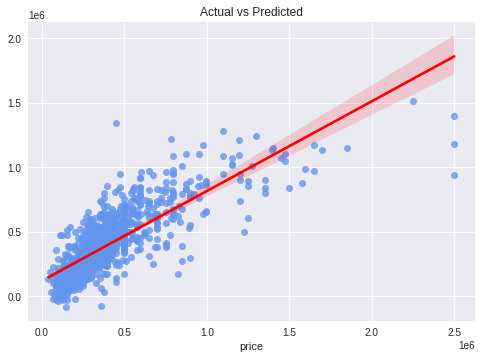

In [17]:
sns.regplot(x=y_test, y=lr.predict(X_test), 
            scatter_kws={"color": "cornflowerblue"}, line_kws={"color": "red"})\
           .set_title('Actual vs Predicted');

-------------

------------

In [ ]:
#joblib.dump(lr, 'models/linear_regression_01-11-2021.plk')

---------------

-------------------

# Polynomial Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (StandardScaler, OneHotEncoder, 
                                   PolynomialFeatures)
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [ ]:
def scores_statistics(estimator, scoring_dict, X_train, y_train, cv=10, return_train_score=False, time_info=False):
    
    scores = cross_validate(estimator, 
                            X=X_train, y=y_train, 
                            scoring=scoring_dict, 
                            cv=cv, 
                            return_train_score=return_train_score)
    
    if time_info:
        fit_time_mean = np.mean(scores['fit_time'])
        fit_time_std = np.std(scores['fit_time'])
        score_time_mean = np.mean(scores['score_time'])
        score_time_std = np.std(scores['score_time'])
        #time_list = []    
        print('fit_time mean:', fit_time_mean)
        print('fit_time std:', fit_time_std)
        print('score_time mean:', score_time_mea)
        print('score_time std:', score_time_std)
    
    
    for key in scoring_dict:
        try:
            mean = np.mean(scores['test_' + key])
            std = np.std(scores['test_' + key])
            print(key, 'mean:', mean)
            print(key, 'std:', std, '\n')
        except:
            continue
    return scores

In [ ]:
features = ['price',
            'floor_area',
            'views',
            'latitude',
            'longitude',
      #      'bedroom',
            'bathroom',
            #'sale_type',
            'type_house',
#            'postcode',
 #           'state_district',
  #          'county',
  #          'city_district',
   #         'road',
      #      'place',
            'code',
  #          'admin1',
  #          'cities'
           ]

In [ ]:
sale_data = pd.read_csv('data_available/sale_data_post_out.csv', sep=',')
print(sale_data.shape)  #### cambiar esto

data = sale_data[features].copy()
print(data.shape)

In [ ]:
print(data.isna().sum())

In [ ]:
train_set, test_set = split_train_test(data, .15)
print(train_set.shape, test_set.shape)
#print(train_set.isna().sum())

In [ ]:
features = list(train_set.columns)
features.remove('price')
features

In [ ]:
X_train, X_test, y_train, y_test = split_x_y(train_set=train_set, 
                                             test_set=test_set, 
                                             features=features, 
                                             target='price')

#print(X_train.isna().sum())

In [ ]:
num_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ])

#cat_features = train_set.select_dtypes('object').columns
type_house_levels = train_set.type_house.unique()
code_levels = train_set.code.unique()

cat_pipe = Pipeline([
    ('one_hot_encoder', OneHotEncoder(categories=[type_house_levels, code_levels]))  #code_levels
                                      #handle_unknown='ignore'
    ])

#num_features = data.select_dtypes('number').columns
#cat_features =  data.select_dtypes('object').columns
num_features = ['floor_area', 
                'views', 
                'latitude', 
                'longitude', 
                'bathroom']
cat_features = ['type_house',
                'code']

preprocessor = ColumnTransformer([
    ('num', num_pipe, num_features),
    ('cat', cat_pipe, cat_features),
    ]) #, remainder='passthrough'
#preprocessor


estimator = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='constant', 
                              fill_value=None)),
    ('regressor', LinearRegression())
                           ])
#estimator

In [ ]:
scoring = {'r2': 'r2', 
           'MAE': 'neg_mean_absolute_error', 
           'MAPE': 'neg_mean_absolute_percentage_error', 
           'RMSE': 'neg_root_mean_squared_error'}
print(X_train.shape)

scores = scores_statistics(estimator=estimator, 
                           scoring_dict=scoring, 
                           X_train=X_train, 
                           y_train=y_train, 
                           cv=10, 
                           return_train_score=False)

In [ ]:
#%%time

from sklearn.model_selection import GridSearchCV, ParameterGrid

#param_grid = [
#    {'degree'=[1,2,3,4,5,6,7,8,9,0]},
#]


grid_search = GridSearchCV(estimator=estimator, 
                           param_grid={'preprocessor__num__poly__degree': [1,2,3,4,5]}, 
                           cv=5, 
                           n_jobs=-1,
                        #   scoring='neg_mean_squared_error',
                        #   return_train_score=True
                          )

grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
#grid_search.best_estimator_

In [ ]:
pd.DataFrame(grid_search.cv_results_)

In [ ]:
sns.regplot(x=y_test, y=estimator.fit(X_train, y_train).predict(X_test), 
            scatter_kws={"color": "cornflowerblue"}, line_kws={"color": "red"})\
           .set_title('Actual vs Predicted');

# Decission Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
num_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
#    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ])

#cat_features = train_set.select_dtypes('object').columns
type_house_levels = train_set.type_house.unique()
code_levels = train_set.code.unique()

cat_pipe = Pipeline([
    ('one_hot_encoder', OneHotEncoder(categories=[type_house_levels, code_levels]))  #code_levels
                                      #handle_unknown='ignore'
    ])

#num_features = data.select_dtypes('number').columns
#cat_features =  data.select_dtypes('object').columns
num_features = ['floor_area', 
                'views', 
                'latitude', 
                'longitude', 
                'bathroom']
cat_features = ['type_house',
                'code']

preprocessor = ColumnTransformer([
    ('num', num_pipe, num_features),
    ('cat', cat_pipe, cat_features),
    ]) #, remainder='passthrough'
#preprocessor


estimator = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='constant', 
                              fill_value=None)),
    ('regressor', DecisionTreeRegressor())
                           ])
#estimator

In [ ]:
grid_search = GridSearchCV(estimator=estimator, 
                           param_grid={
                        #       'preprocessor__num__poly__degree': [1,2,3,4,5],
                               'regressor__max_depth': range(1, 15), #[2,3,4,5,6,7]
                           }, 
                           cv=5, 
                           n_jobs=-1,
                        #   scoring='neg_mean_squared_error',
                        #   return_train_score=True
                          )

grid_search.fit(X_train, y_train)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
#pd.DataFrame(grid_search.cv_results_)

In [ ]:
sns.regplot(x=y_test, y=estimator.fit(X_train, y_train).predict(X_test), 
            scatter_kws={"color": "cornflowerblue"}, line_kws={"color": "red"})\
           .set_title('Actual vs Predicted');

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

```python
RandomForestRegressor(n_estimators=100, 
                      *, 
                      criterion='squared_error', 
                      max_depth=None, 
                      min_samples_split=2, 
                      min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, 
                      max_features='auto', 
                      max_leaf_nodes=None, 
                      min_impurity_decrease=0.0, 
                      bootstrap=True, 
                      oob_score=False, 
                      n_jobs=None, 
                      random_state=None, 
                      verbose=0, 
                      warm_start=False, 
                      ccp_alpha=0.0, 
                      max_samples=None)
```

In [ ]:
rfr_pipe_est = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='constant', 
                              fill_value=None)),
    ('regressor', RandomForestRegressor())
                           ])
#estimator

In [ ]:
param_grid = [
    {'regressor__n_estimators': [3,10,30], 
     'regressor__max_features': range(1, 8)},
    {'regressor__n_estimators': range(41,60)}, #[3,10,30,40,50,60]
]

grid_search = GridSearchCV(estimator=rfr_pipe_est, 
                           param_grid=param_grid,
                           #{
                        #       'preprocessor__num__poly__degree': [1,2,3,4,5],
                        #       'regressor__max_depth': range(1, 15), #[2,3,4,5,6,7]
                        #   }, 
                           cv=5, 
                           n_jobs=-1,
                        #   scoring='neg_mean_squared_error',
                        #   return_train_score=True
                          )

grid_search.fit(X_train, y_train)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
pd.DataFrame(grid_search.cv_results_).tail()

In [ ]:
rfr_pipe_est = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='constant', 
                              fill_value=None)),
    ('regressor', RandomForestRegressor(n_estimators=44))
                           ])
#estimator

scores = scores_statistics(estimator=rfr_pipe_est, 
                           scoring_dict=scoring, 
                           X_train=X_train, 
                           y_train=y_train, 
                           cv=10, 
                           return_train_score=False)

In [ ]:
sns.regplot(x=y_test, y=rfr_pipe_est.fit(X_train, y_train).predict(X_test), 
            scatter_kws={"color": "cornflowerblue"}, line_kws={"color": "red"})\
           .set_title('Actual vs Predicted');

# K Nearest Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

```python
KNeighborsRegressor(n_neighbors=5, 
                    *, 
                    weights='uniform', 
                    algorithm='auto', 
                    leaf_size=30, 
                    p=2, 
                    metric='minkowski', 
                    metric_params=None, 
                    n_jobs=None)
```

In [ ]:
num_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ])

#cat_features = train_set.select_dtypes('object').columns
type_house_levels = train_set.type_house.unique()
code_levels = train_set.code.unique()

cat_pipe = Pipeline([
    ('one_hot_encoder', OneHotEncoder(categories=[type_house_levels, code_levels]))  #code_levels
                                      #handle_unknown='ignore'
    ])

#num_features = data.select_dtypes('number').columns
#cat_features =  data.select_dtypes('object').columns
num_features = ['floor_area', 
                'views', 
                'latitude', 
                'longitude', 
                'bathroom']
cat_features = ['type_house',
                'code']

preprocessor = ColumnTransformer([
    ('num', num_pipe, num_features),
    ('cat', cat_pipe, cat_features),
    ]) #, remainder='passthrough'

In [ ]:
knnr_pipe_est = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='constant', 
                              fill_value=None)),
    ('regressor', KNeighborsRegressor())
                           ])

In [ ]:
param_grid = [
    {
        'regressor__n_neighbors': [5,10,15,20,25,30,35,40,45,50], 
    },
    {
        'preprocessor__num__poly__degree': [1,2,3,4,5],
        'regressor__n_neighbors': [5,10,15,20,25,30,35,40,45,50],
    }, 
]

grid_search = GridSearchCV(estimator=knnr_pipe_est, 
                           param_grid=param_grid,
                           cv=5, 
                           n_jobs=-1,
                        #   scoring='neg_mean_squared_error',
                        #   return_train_score=True
                          )

grid_search.fit(X_train, y_train)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)